# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
$$


- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)


## 손실(loss)함수/오차(error)함수/비용(cost)함수/목적(objective)함수

- __모델이 출력한 예측값과 실제 값 사이의 차이를 계산__하는 함수
- 평가 지표로 사용되기도 하고 모델을 최적화하는데 사용된다.
- -> __손실을 가장 적게해주는 가중치는 무엇인가??__

## 최적화(Optimize)

- 손실함수의 값이 최소화 되도록 모델을 학습하는 과정.
- 최적화의 두가지 방법
    - 정규방정식
    - 경사하강법

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유의 주택가격(중앙값) (단위: $1,000)


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X, y = data['data'], data['target']
df = pd.DataFrame(X, columns=data['feature_names'])
df['MEDV'] = y

In [4]:
df.shape

(506, 14)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


각 columns에 부여될 가중치들은 MEDV 와의 오차를 가장 줄일 수 있는 수치는 무엇인가?

In [6]:
df['CHAS'].value_counts()  #범주형이다.

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## LinearRegression
- 가장 기본적인 선형 회귀 모델
- feature 전처리
    - 범주형 -> one hot encoding
    - 연속형 -> feature scaling 한다. (standard scaler가 성능이 더 잘나오는 경향이 있다.)

In [8]:
# 원핫 인코딩 하기
chas_df = pd.get_dummies(df['CHAS'])
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [9]:
df2 = df.join(chas_df) # 원핫인코딩 된 CHAS 컬럼을 DF에 추가함
df2.drop(columns = 'CHAS', inplace=True) # CHAS 컬럼 제거
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [10]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')

In [11]:
# train, test 셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((379, 14), (127, 14))

In [12]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train.columns  # 원래는 13개

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 평가지표 출력함수
def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)
    print(f"MSE: {mse}, RMSE: {rmse}, R^2: {r2}\n\n")
    

In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  #각 feature에 곱할 weight, bias를 찾는다.

LinearRegression()

In [16]:
# 편향(bias)
lr.intercept_

22.608707124010557

In [17]:
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753, -1.80876877,  2.60991991,
       -0.19823317, -3.00216551,  2.08021582, -1.93289037, -2.15743759,
        0.75199122, -3.59027047, -0.29704388,  0.29704388])

In [18]:
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.971001
ZN         1.046678
INDUS     -0.040448
NOX       -1.808769
RM         2.609920
AGE       -0.198233
DIS       -3.002166
RAD        2.080216
TAX       -1.932890
PTRATIO   -2.157438
B          0.751991
LSTAT     -3.590270
CHAS_0    -0.297044
CHAS_1     0.297044
dtype: float64

In [19]:
X_train.iloc[0]

CRIM         0.19133
ZN          22.00000
INDUS        5.86000
NOX          0.43100
RM           5.60500
AGE         70.20000
DIS          7.95490
RAD          7.00000
TAX        330.00000
PTRATIO     19.10000
B          389.13000
LSTAT       18.46000
CHAS_0       1.00000
CHAS_1       0.00000
Name: 245, dtype: float64

In [20]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title="Train")
print_regression_metrics(y_test, pred_test, title="Test")

Train
MSE: 19.640519427908046, RMSE: 4.4317625644779355, R^2: 0.7697699488741149


Test
MSE: 29.782245092302407, RMSE: 5.457311159564059, R^2: 0.6354638433202124




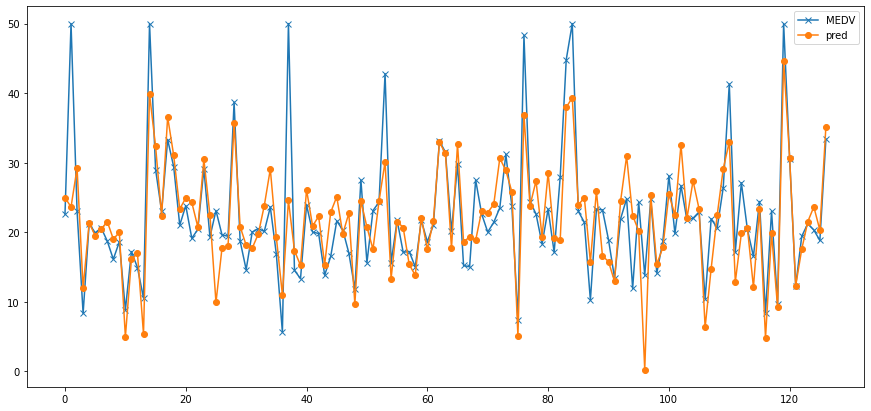

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(range(len(y_test)),  y_test, label='MEDV', marker='x')
plt.plot(range(len(y_test)),  pred_test, label='pred', marker='o')
plt.legend()
plt.show()


# 다항회귀(Polynomial Regression)
- 단순한 직선형보다는 복잡한 비선형 형태의 데이터를 추론하기 위한 모델
- 2차 이상
- feature들을 거듭제곱한 feature들을 추가하여 모델링한다.
- 하나의 feature가 여러 column으로 표현된다고 생각하면 될듯.
- PolynomialFeatures 변환기를 이용

In [22]:
np.random.seed(0)
m = 100  # 데이터 개수
X = 6*np.random.rand(m, 1) - 3
y=X**2 + X + 2 + np.random.normal(0,1,size=(m,1))
y = y.flatten()

In [23]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,1.213510
1,1.291136,5.858995
2,0.616580,3.462414
3,0.269299,0.805577
4,-0.458071,3.240010


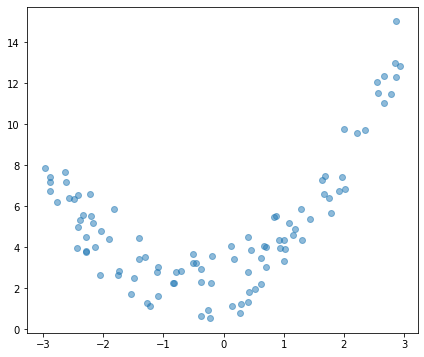

In [24]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5)
plt.show()

In [25]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [26]:
lr.coef_, lr.intercept_

(array([0.78189543]), 5.175619278567209)

In [27]:
pred = lr.predict(X)  # y hat값 구하기
print_regression_metrics(y, pred)

MSE: 7.729204760808937, RMSE: 2.7801447373848966, R^2: 0.19138252437306003




R^2이 0.19로 너무 낮다. 왜그럴까?   
--> 우리는 이차식을 생각하고 만들었는데, lr은 1차식으로 만듬.

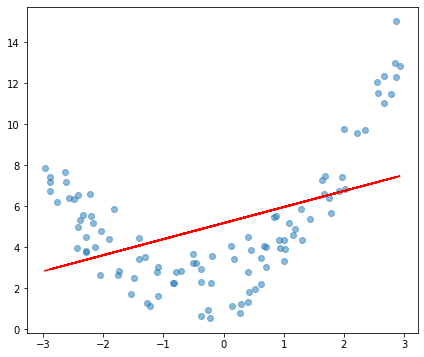

In [28]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, pred, color='red')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

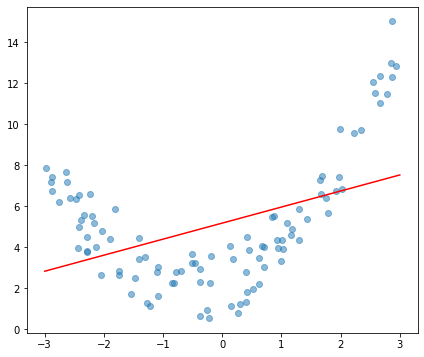

In [29]:
X_new = np.linspace(-3, 3, 100).reshape(-1,1)
y_new = lr.predict(X_new)

plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_new, color='red')
plt.show

잘 맞지 않는다. 평균으로 예측한것과 크게 다르지 않음

In [30]:
from sklearn.preprocessing import PolynomialFeatures

pnf = PolynomialFeatures(degree=2, # degree: 최고차항 지정
                         include_bias=False,  #True: 상수항 추가(모든값이 1인 feature 추가)
                        )
X_poly = pnf.fit_transform(X)

In [31]:
X.shape, X_poly.shape # 상수항, X^2항 추가됨

((100, 1), (100, 2))

In [32]:
X_poly

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923],
       [ 0.87536468,  0.76626332],
       [-0.37447673,  0.14023282],
       [ 2.350638  ,  5.52549903],
       [ 2.78197656,  7.7393936 ],
       [-0.69935089,  0.48909166],
       [ 1.75035023,  3.06372592],
       [ 0.17336952,  0.03005699],
       [ 0.40826737,  0.16668224],
       [ 2.55357983,  6.52076995],
       [-2.57378365,  6.62436228],
       [-2.4772242 ,  6.13663975],
       [-2.87868962,  8.2868539 ],
       [ 1.99571907,  3.98289462],
       [ 1.66894051,  2.78536241],
       [ 2.22007289,  4.92872363],
       [ 2.87171005,  8.24671863],
       [ 1.79495139,  3.22185048],
       [-0.23112383,  0.05341822],
       [ 1.68317506,  2.83307827],
       [-2.29035344,  5.2457189 ],
       [ 0.83952613,  0.70480412],
       [-2.13988028,  4.57908759],
       [ 2.6680135 ,  7.11829605],
       [ 0.13108993,

In [33]:
pnf.get_feature_names()  # 피쳐 이름도 있음.

['x0', 'x0^2']

In [34]:
X[:2]

array([[0.29288102],
       [1.2911362 ]])

In [35]:
pnf.get_feature_names()

['x0', 'x0^2']

In [36]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)  # X값 집합에 X^2 칼럼이 추가되어 회귀 적합을 함.

LinearRegression()

In [37]:
lr2.coef_, lr2.intercept_  # 가중치, 절편을 비교적 잘 찾았음을 알 수 있다.

(array([0.97906552, 0.94978823]), 2.340500756262887)

In [38]:
# 그래프로 확인

In [39]:
X_new_poly = pnf.transform(X_new)
X_new.shape, X_new_poly.shape

((100, 1), (100, 2))

In [40]:
y_new = lr2.predict(X_new_poly)
y_new

array([ 7.95139826,  7.66884669,  7.39327244,  7.12467552,  6.86305592,
        6.60841364,  6.36074869,  6.12006106,  5.88635076,  5.65961778,
        5.43986212,  5.22708379,  5.02128278,  4.8224591 ,  4.63061274,
        4.44574371,  4.26785199,  4.09693761,  3.93300054,  3.7760408 ,
        3.62605839,  3.48305329,  3.34702553,  3.21797508,  3.09590196,
        2.98080617,  2.8726877 ,  2.77154655,  2.67738272,  2.59019622,
        2.50998705,  2.4367552 ,  2.37050067,  2.31122347,  2.25892359,
        2.21360103,  2.1752558 ,  2.14388789,  2.11949731,  2.10208405,
        2.09164811,  2.0881895 ,  2.09170821,  2.10220425,  2.11967761,
        2.14412829,  2.1755563 ,  2.21396163,  2.25934429,  2.31170427,
        2.37104157,  2.4373562 ,  2.51064815,  2.59091743,  2.67816403,
        2.77238796,  2.8735892 ,  2.98176778,  3.09692367,  3.21905689,
        3.34816744,  3.48425531,  3.6273205 ,  3.77736301,  3.93438285,
        4.09838002,  4.26935451,  4.44730632,  4.63223546,  4.82

<function matplotlib.pyplot.show(close=None, block=None)>

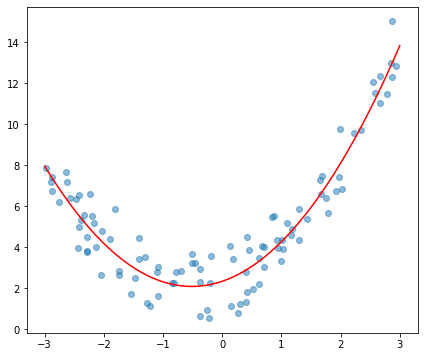

In [41]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_new, color='red')  # 이떄의 y_new는 lr2를 이용해 도출한 예측값
plt.show

In [42]:
# 모델평가
print_regression_metrics(y, lr2.predict(X_poly))

MSE: 0.9735576723414217, RMSE: 0.9866902616026073, R^2: 0.8981478985551461




In [43]:
np.mean(y)

5.047985043575299

In [44]:
# input data가 다차원인 경우(feature수가 N개)
data = np.arange(12).reshape(4,3) # feature가 3개인 셈
data.shape

(4, 3)

In [45]:
data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [46]:
pnf2 = PolynomialFeatures(degree=2)
data_poly = pnf2.fit_transform(data)
data_poly.shape  # 제곱한 항, 교차항, 상수항 까지 총 10개가 됨.

(4, 10)

In [47]:
pnf2.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [48]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names())

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,6.0,7.0,8.0,36.0,42.0,48.0,49.0,56.0,64.0
3,1.0,9.0,10.0,11.0,81.0,90.0,99.0,100.0,110.0,121.0


In [55]:
pnf = PolynomialFeatures(degree=100, include_bias=False)
X_train_poly_100 = pnf.fit_transform(X)
X_train_poly_100.shape, X.shape

((100, 100), (100, 1))

In [56]:
lr = LinearRegression()
lr.fit(X_train_poly_100, y)

LinearRegression()

In [58]:
lr.coef_.shape

(100,)

In [62]:
X_new = np.linspace(-3,3,100).reshape(-1,1)
X_new_poly_100 = pnf.transform(X_new)  # 중간단계
print(X_new_poly_100)
pred_new_100 = lr.predict(X_new_poly_100)

[[-3.00000000e+00  9.00000000e+00 -2.70000000e+01 ...  5.72641690e+46
  -1.71792507e+47  5.15377521e+47]
 [-2.93939394e+00  8.64003673e+00 -2.53964716e+01 ...  7.74932455e+45
  -2.27783176e+46  6.69544488e+46]
 [-2.87878788e+00  8.28741965e+00 -2.38577232e+01 ...  1.00588240e+45
  -2.89572207e+45  8.33616959e+45]
 ...
 [ 2.87878788e+00  8.28741965e+00  2.38577232e+01 ...  1.00588240e+45
   2.89572207e+45  8.33616959e+45]
 [ 2.93939394e+00  8.64003673e+00  2.53964716e+01 ...  7.74932455e+45
   2.27783176e+46  6.69544488e+46]
 [ 3.00000000e+00  9.00000000e+00  2.70000000e+01 ...  5.72641690e+46
   1.71792507e+47  5.15377521e+47]]


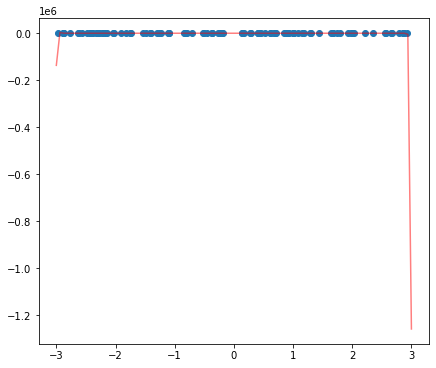

In [64]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_new, pred_new_100, color="r", alpha=0.5)

## Polynomial Features를 boston set에 적용

In [49]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)
X_test_scaled_poly = pnf.transform(X_test_scaled)

In [50]:
X_train_scaled.shape, X_train_scaled_poly.shape

((379, 14), (379, 119))

In [51]:
pnf.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8

In [52]:
lr3 = LinearRegression()
lr3.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [53]:
pred_train3 = lr3.predict(X_train_scaled_poly)
pred_test3 = lr3.predict(X_test_scaled_poly)

In [54]:
print_regression_metrics(y_train, pred_train3, title="Train poly")
print_regression_metrics(y_test, pred_test3, title="Test poly")

Train poly
MSE: 4.091369291723247, RMSE: 2.022713348876515, R^2: 0.9520401604109383


Test poly
MSE: 31.990455686689362, RMSE: 5.656010580496589, R^2: 0.6084352361509877




test셋에 대한 R^2data 대비 모델이 복잡하다. overfitting남.  


president20500@gmail.com


## 규제 (Regularization)
- 선형 회귀 모델에서 과적합 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용하는 것.
- 입력데이터의 Feature들이 너무 많은 경우 과적합이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 과적합이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.
    

## Ridge Regression
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Normm)을 더해준다.
- $\lambda$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

## 규제 alpha 에 따른 weight 변화

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

## 엘라스틱넷
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 회귀 규제항을 더해서 추가한다. 
- 혼합뷰율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 릿지를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 라쏘 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 엘라스틱넷을 사용한다.